# Credit Card Fraud Detection

This notebook works us through a typical workflow in solving Data science Problems

## Workflow stages

This solution workflow goes through six stages in solving machine learning problems.

1. Question or problem definition.
2. Acquire training and testing data.
3. Wrangle, prepare, cleanse the data.
4. Analyze, identify patterns, and explore the data.
5. Model, predict and solve the problem.
6. Visualize, report, and present the problem solving steps and final solution.


The workflow indicates general sequence of how each stage may follow the other. However there are use cases with exceptions.

- We may combine mulitple workflow stages. We may analyze by visualizing data.
- Perform a stage earlier than indicated. We may analyze data before and after wrangling.
- Perform a stage multiple times in our workflow. Visualize stage may be used multiple times.
- Drop a stage altogether. We may not need supply stage to productize or service enable our dataset for a competition.


## Question and problem definition
In this Problem, we are trying to train our model to be able to detect fraud in credit card transactions.The time and Amount of transactions are considered as they will help us in determining whether a fraudulent transaction occurs at a certain time or whether a transaction of certain amount of money will lead to fraudulent transactions.








## Workflow goals

The data science solutions workflow solves for seven major goals.

**Classifying.** We may want to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal.

**Correlating.** One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a [correlation](https://en.wikiversity.org/wiki/Correlation) among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing, or correcting features.

**Converting.** For modeling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.

**Completing.** Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.

**Correcting.** We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contribting to the analysis or may significantly skew the results.

**Creating.** Can we create new features based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.

**Charting.** How to select the right visualization plots and charts depending on nature of the data and the solution goals.


In [20]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression

# Acquire data
The Python Pandas packages helps us work with our datasets. We start by acquiring the datasets into Pandas DataFrames. We then take a look at the first ten rows in the dataset to see what our data looks like

In [21]:
dataset =pd.read_csv(r"D:\creditcard.csv")
dataset.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


# Analyze by describing data

We take a look at the dataset to determine;
1. Which features are categorical or numerical values
2. Missing Values
3. Datatype of the various features

## **Which features are available in the dataset?**

Noting the feature names helps  for directly manipulating or analyzing the data.

In [22]:
print(dataset.columns.values)

['Time' 'V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11' 'V12'
 'V13' 'V14' 'V15' 'V16' 'V17' 'V18' 'V19' 'V20' 'V21' 'V22' 'V23' 'V24'
 'V25' 'V26' 'V27' 'V28' 'Amount' 'Class']


**V1 to V28 are the names of different customers but are encoded for security reasons.**

**Time shows the time various card transactions was carried out**

**Amount shows the amount of money that was involved in each transaction**

**Class dictates whether a transaction was valid or fraudulent** 

## **Which features are categorical or numerical?**

These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plots for visualization.


**All the features are numerical**

## Checking for missing Values



In [23]:
dataset.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**This shows we have no missing values**

## What are the data types for various features?

This helps us during converting goal.

Thirty features are floats.

One feature is integer.

In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Analyze by Visualizing data

Viualizing our data will help us in understanding the correlation between the features and our target variable(Class)

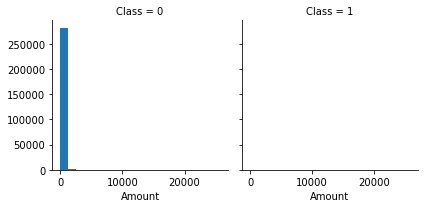

In [25]:
g = sns.FacetGrid(dataset, col='Class')
g.map(plt.hist, 'Amount', bins=20)

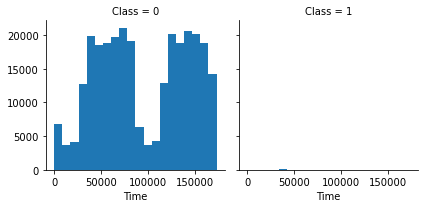

In [26]:
g = sns.FacetGrid(dataset, col='Class')
g.map(plt.hist, 'Time', bins=20)

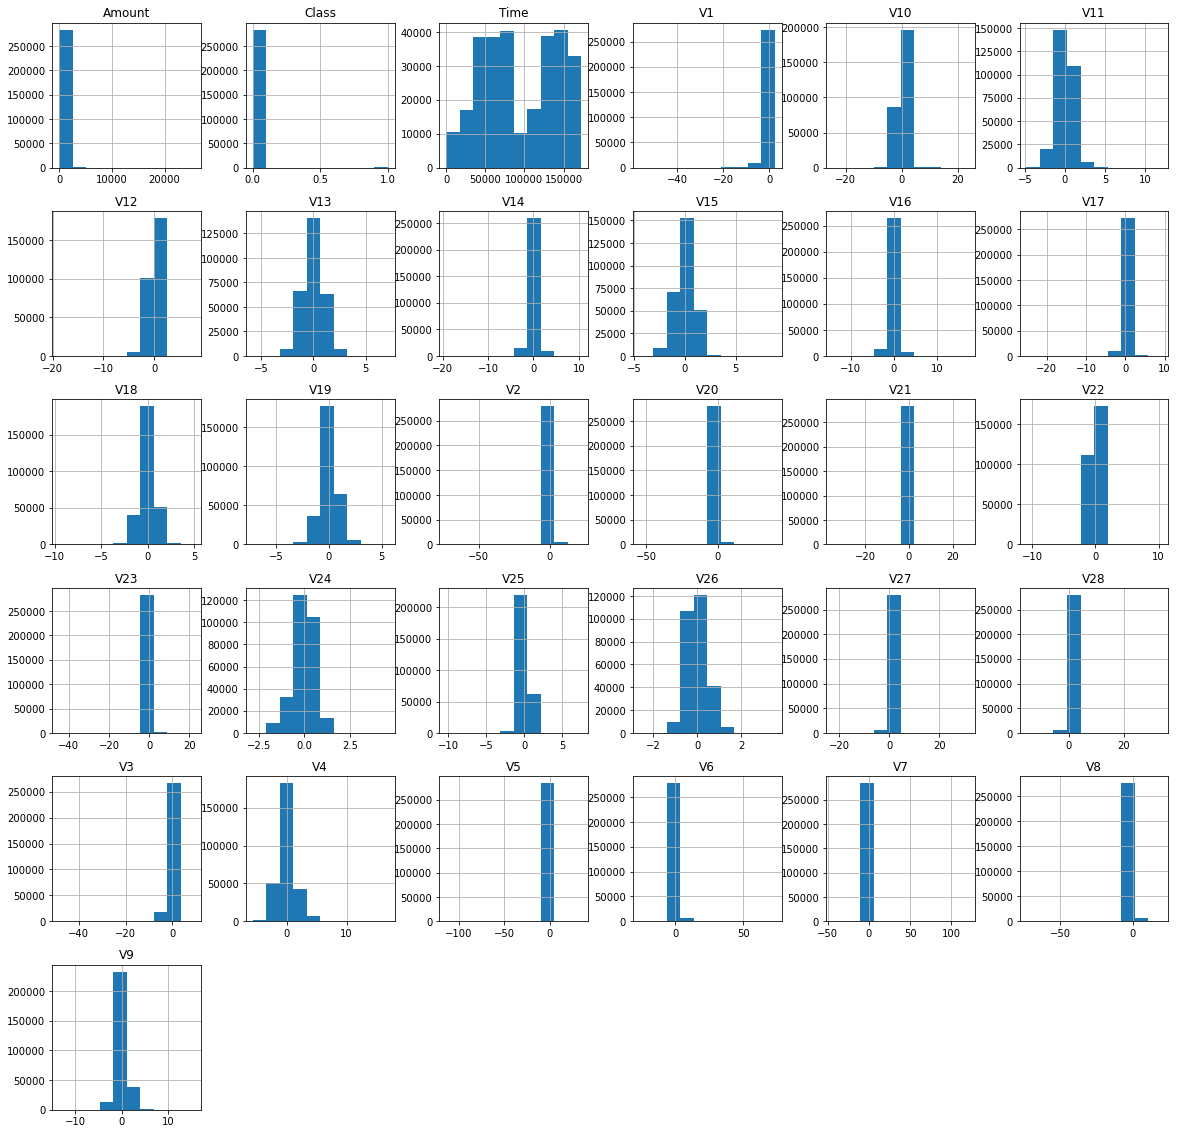

In [27]:
dataset.hist(figsize=(20,20))
plt.show()

**From our Analysis we can see that the the number of fraud cases is less compared to the number number of valid cases.**  

In [28]:
#determine the number of fraud cases in the dataset
fraud=dataset[dataset['Class']==1]
valid=dataset[dataset['Class']==0]

outlier_fraction=len(fraud)/float(len(valid))
print(outlier_fraction)


print('fraud_cases',format(len(fraud)))
print('valid_cases',format(len(valid)))

0.0017304750013189597
fraud_cases 492
valid_cases 284315


**Assumptions from our Analysis is correct, as we can see we have 492 fraud_caases and 284315 number of valid_cases**

## Checking for correlation in the dataset

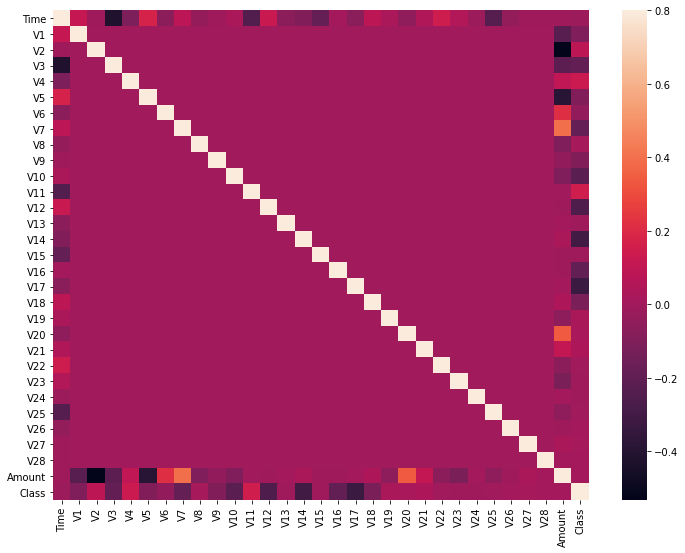

In [29]:
#checking for correlation in the data
corrmat=dataset.corr()
fig=plt.figure(figsize=(12,9))

sns.heatmap(corrmat, vmax=.8)

From the heatmap we can see that there is litlle or no multicollinearity between the independent features,
therfore there is no need of dropping any of the features. 

## Model, predict and solve

Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression.

## splitting the dataset into into features(Independent Variables) and dependent variables


In [30]:
X = dataset.iloc[:, :-1].values #Independent Variables
Y = dataset.iloc[:, -1].values  #Target Variable
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size =0.25,random_state=0)



## Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
X_train

array([[ 0.75665415,  1.04272047,  0.06657394, ..., -0.21031503,
        -0.2607924 , -0.35356699],
       [-0.2834455 ,  0.65277143,  0.27902921, ..., -0.02422764,
        -0.01672827, -0.34945825],
       [ 1.35155922, -0.21266203,  0.00863513, ...,  0.59177033,
         0.631378  , -0.33270102],
       ...,
       [-0.38298583,  0.77014889, -0.57187168, ..., -0.00246971,
         0.01108282, -0.21608519],
       [ 0.05149257,  0.91611288, -1.02491801, ..., -0.0825166 ,
        -0.100612  ,  0.33339889],
       [-0.41938711, -0.30165824,  0.45289483, ...,  0.21630833,
         0.36475181, -0.29225808]])

In [33]:
X_test

array([[ 0.65294525, -0.16599158,  0.63983999, ...,  0.27075637,
         0.49783617, -0.19554147],
       [ 1.31431581, -0.17944516,  0.56446664, ...,  0.19204146,
         0.54241708, -0.34869289],
       [ 1.21401756, -0.82446257, -1.45165396, ...,  0.71272832,
         1.35151784,  0.03003663],
       ...,
       [-0.78584206,  0.71437549, -0.26386467, ..., -0.02481731,
         0.01981277, -0.31638689],
       [ 1.22553375, -1.64876398,  1.27119885, ...,  1.17517663,
        -0.59535274,  0.04610907],
       [-1.14716   ,  0.64010398, -0.43604741, ..., -0.25190392,
         0.0367097 ,  0.00586754]])

# Training the logistic Regression on the training model 

In [34]:
from sklearn.linear_model import LogisticRegression
Classifier = LogisticRegression(random_state = 0)
Classifier.fit(X_train,Y_train)


LogisticRegression(random_state=0)

In [35]:
Y_pred=Classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1),Y_test.reshape(len(Y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


## Lets validate our prediction with confusion matrix and accuracy score

In [36]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm =confusion_matrix(Y_test,Y_pred)
print(cm)
accuracy_score(Y_test,Y_pred)

[[71071    11]
 [   41    79]]


0.9992696834358585

We can see from the confusion matrix we had only 52 wrong preictions while the rest was correct and our accuracy score is high which means our model performed very well.

In [38]:
from sklearn.metrics import classification_report
classification_report(Y_test,Y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     71082\n           1       0.88      0.66      0.75       120\n\n    accuracy                           1.00     71202\n   macro avg       0.94      0.83      0.88     71202\nweighted avg       1.00      1.00      1.00     71202\n'